In [ ]:
import numpy as np 
import pandas as pd 
from pathlib import Path 
import os 

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa

print('librosa', librosa.version.version)

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


librosa 0.8.1


In [ ]:
!unzip '/content/drive/My Drive/IDP/Dataset/bangla_audio_clip.zip'

Archive:  /content/drive/My Drive/IDP/Dataset/bangla_audio_clip.zip
  inflating: Bangla_Dataset/BANGLA_MEDIUM/31/medium_bangla_voice_10.wav  
  inflating: Bangla_Dataset/BANGLA_MEDIUM/14/medium_bangla_voice_2.wav  
  inflating: Bangla_Dataset/BANGLA_MEDIUM/31/medium_bangla_voice_9.wav  
  inflating: Bangla_Dataset/BANGLA_MEDIUM/14/medium_bangla_voice_6.wav  
  inflating: Bangla_Dataset/BANGLA_MEDIUM/31/medium_bangla_voice_8.wav  
  inflating: Bangla_Dataset/BANGLA_MEDIUM/31/medium_bangla_voice_1.wav  
  inflating: Bangla_Dataset/BANGLA_MEDIUM/28/medium_bangla_voice_9.wav  
  inflating: Bangla_Dataset/BANGLA_MEDIUM/17/medium_bangla_voice_8.wav  
  inflating: Bangla_Dataset/BANGLA_MEDIUM/14/medium_bangla_voice_3.wav  
  inflating: Bangla_Dataset/BANGLA_MEDIUM/31/medium_bangla_voice_7.wav  
  inflating: Bangla_Dataset/BANGLA_MEDIUM/17/medium_bangla_voice_7.wav  
  inflating: Bangla_Dataset/BANGLA_MEDIUM/14/medium_bangla_voice_5.wav  
  inflating: Bangla_Dataset/BANGLA_MEDIUM/14/medium_ban

In [ ]:
# !apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

In [ ]:
PATH = 'Bangla_Dataset'
os.listdir(PATH)

['BANGLA_HIGH', 'BANGLA_SLOW', 'BANGLA_MEDIUM']

In [ ]:
label = []
name = []
audio_file = []
for c in os.listdir(PATH):
  cur_path = os.path.join(PATH,c)
  for c1 in os.listdir(cur_path): 
    for c2 in os.listdir(os.path.join(cur_path,c1)): 
      full_path = os.path.join(cur_path, c1)
      audio_file.append(full_path+'/'+c2)
      label.append(int(c1))
      name.append(str(c1))
# data = {
#     'Audio': np.array(audio_file), 
#     'Label': np.array(label)
# }
# audio_data = pd.DataFrame(data, columns=['Audio', 'Label'])

In [ ]:
os.listdir('/content/drive/My Drive/IDP/Audio Data/3')[:-1]

['Recording (5).wav',
 'Recording (6).wav',
 'Recording (7).wav',
 'Recording (8).wav',
 'Recording (9).wav',
 'Recording (10).wav',
 'Recording (11).wav',
 'Recording (12).wav',
 'Recording (13).wav',
 'Recording (14).wav']

In [ ]:
# label = []
# name = []
# audio_file = []

In [ ]:
# os.listdir('/content/drive/My Drive/IDP/Audio Data/1')[:-1]
# for c in os.listdir('/content/drive/My Drive/IDP/Audio Data/3')[:-1]: 
#   audio_file.append(os.path.join('/content/drive/My Drive/IDP/Audio Data/3', c))
#   label.append(int(42))
#   name.append(str('yasin'))

# for c in os.listdir('/content/drive/My Drive/IDP/Audio Data/1'): 
#   audio_file.append(os.path.join('/content/drive/My Drive/IDP/Audio Data/1', c))
#   label.append(int(41))
#   name.append(str('rahat'))

# for c in os.listdir('/content/drive/My Drive/IDP/Audio Data/2'): 
#   audio_file.append(os.path.join('/content/drive/My Drive/IDP/Audio Data/2', c))
#   label.append(int(43))
#   name.append(str('rj'))

In [ ]:
PATH = "/content/drive/My Drive/IDP/Audio Data/upload_audio"
os.listdir(PATH)
cnt = 41 
for speaker in os.listdir(PATH): 
  for v in os.listdir(os.path.join(PATH, speaker)): 
    audio_file.append(os.path.join(os.path.join(PATH, speaker),v))
    label.append(cnt)
    name.append(speaker)

  cnt+=1

In [ ]:
for c in os.listdir('/content/drive/My Drive/IDP/Audio Data/1'): 
  audio_file.append(os.path.join('/content/drive/My Drive/IDP/Audio Data/1', c))
  label.append(41)
  name.append(str('rahat'))


for c in os.listdir('/content/drive/My Drive/IDP/Audio Data/2'): 
  audio_file.append(os.path.join('/content/drive/My Drive/IDP/Audio Data/2', c))
  label.append(int(45))
  name.append(str('rj'))

for c in os.listdir('/content/drive/My Drive/IDP/Audio Data/3'): 
  audio_file.append(os.path.join('/content/drive/My Drive/IDP/Audio Data/3', c))
  label.append(int(46))
  name.append(str('yasin'))

# data = {
#     'Audio': np.array(audio_file), 
#     'Label': np.array(label), 
#     'Name': np.array(name)
# }
# audio_data = pd.DataFrame(data, columns=['Audio', 'Label', 'Name'])


In [ ]:
!pip install audiomentations
from audiomentations import Compose, AddGaussianNoise, PitchShift, HighPassFilter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 6.8 MB/s 


In [ ]:
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1), 
    # PitchShift(min_semitones=-4, max_semitones=4, p=0.5), 
    HighPassFilter(min_cutoff_freq=1000, max_cutoff_freq=2000, p=1)
])

In [ ]:
import soundfile as sf 

In [ ]:
PATH = "/content/drive/My Drive/IDP/Audio Data/upload_audio"
os.listdir(PATH)
cnt = 41 
for speaker in os.listdir(PATH): 
  for v in os.listdir(os.path.join(PATH, speaker)): 
    #audio_file.append(os.path.join(os.path.join(PATH, speaker),v))    
    signal, sr= librosa.load(os.path.join(os.path.join(PATH, speaker),v))
    augmented_signal = augment(signal, sr)
    sf.write(f"augmented_data_{speaker}_{v}", augmented_signal, sr)
    audio_file.append(f"augmented_data_{speaker}_{v}")
    label.append(cnt)
    name.append(speaker)
  cnt+=1

for c in os.listdir('/content/drive/My Drive/IDP/Audio Data/3'): 
  #audio_file.append(os.path.join('/content/drive/My Drive/IDP/Audio Data/3', c))
  signal, sr= librosa.load(os.path.join('/content/drive/My Drive/IDP/Audio Data/3', c))
  augmented_signal = augment(signal, sr)
  sf.write(f"augmented_data_3_{c}", augmented_signal, sr)
  audio_file.append(f"augmented_data_3_{c}")
  label.append(int(46))
  name.append(str('yasin'))


In [ ]:
from IPython.display import Audio
Audio("augmented_data_3_Recording (10).wav")

In [ ]:
name[100], label[100]

('8', 8)

In [ ]:
data = {
    'Audio': np.array(audio_file), 
    'Label': np.array(label), 
    'Name': np.array(name)
}
audio_data = pd.DataFrame(data, columns=['Audio', 'Label', 'Name'])

In [ ]:
audio_data[audio_data['Label'] == 46]

,Audio,Label,Name
1255,/content/drive/My Drive/IDP/Audio Data/3/Recor...,46,yasin
1256,/content/drive/My Drive/IDP/Audio Data/3/Recor...,46,yasin
1257,/content/drive/My Drive/IDP/Audio Data/3/Recor...,46,yasin
1258,/content/drive/My Drive/IDP/Audio Data/3/Recor...,46,yasin
1259,/content/drive/My Drive/IDP/Audio Data/3/Recor...,46,yasin
1260,/content/drive/My Drive/IDP/Audio Data/3/Recor...,46,yasin
1261,/content/drive/My Drive/IDP/Audio Data/3/Recor...,46,yasin
1262,/content/drive/My Drive/IDP/Audio Data/3/Recor...,46,yasin
1263,/content/drive/My Drive/IDP/Audio Data/3/Recor...,46,yasin
1264,/content/drive/My Drive/IDP/Audio Data/3/Recor...,46,yasin


In [ ]:
audio_data.to_csv('audio_data_csv.csv', index=None, header=True)

In [ ]:
audio_data.head(5)

,Audio,Label,Name
0,Bangla_Dataset/BANGLA_HIGH/30/high_bangla_voic...,30,30
1,Bangla_Dataset/BANGLA_HIGH/30/high_bangla_voic...,30,30
2,Bangla_Dataset/BANGLA_HIGH/30/high_bangla_voic...,30,30
3,Bangla_Dataset/BANGLA_HIGH/30/high_bangla_voic...,30,30
4,Bangla_Dataset/BANGLA_HIGH/30/high_bangla_voic...,30,30


In [ ]:
from sklearn.utils import shuffle
audio_data = shuffle(audio_data, random_state=8)
audio_data.head(5)

,Audio,Label,Name
176,Bangla_Dataset/BANGLA_HIGH/3/high_bangla_voice...,3,3
576,Bangla_Dataset/BANGLA_SLOW/3/slow_bangla_voice...,3,3
914,Bangla_Dataset/BANGLA_MEDIUM/34/medium_bangla_...,34,34
671,Bangla_Dataset/BANGLA_SLOW/13/slow_bangla_voic...,13,13
669,Bangla_Dataset/BANGLA_SLOW/10/slow_bangla_voic...,10,10


In [ ]:
audio_file = audio_data.loc[5, 'Label']
audio_file

30

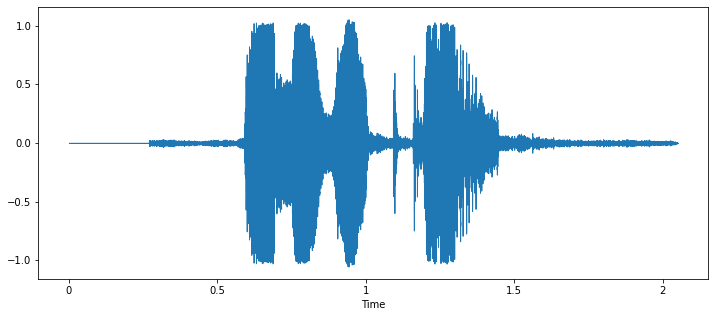

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt 
data, sample_rate = librosa.load(audio_data.Audio[0])
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate);

In [ ]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
(mfccs.shape)
(mfccs)

array([[-4.7804626e+02, -4.7804626e+02, -4.7804626e+02, ...,
        -3.1166690e+02, -3.2026605e+02, -3.5629031e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         7.3731064e+01,  7.6721085e+01,  7.6673340e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.1298521e+01, -3.3027370e+00,  1.0289221e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.0183167e+00,  6.4052048e+00,  7.6823258e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.7537284e+00,  5.0244551e+00, -3.4442985e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -9.8402286e-01,  2.4747562e-01, -4.3727036e+00]], dtype=float32)

In [ ]:
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num in tqdm(range(audio_data.shape[0])):
    data=features_extractor(audio_data.Audio[index_num])
    extracted_features.append([data, audio_data.Label[index_num]])

 95%|█████████▍| 1250/1318 [01:15<00:19,  3.42it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 95%|█████████▍| 1251/1318 [01:17<00:45,  1.47it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 95%|█████████▍| 1252/1318 [01:17<00:41,  1.60it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 95%|█████████▌| 1253/1318 [01:18<00:41,  1.57it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 95%|█████████▌| 1254/1318 [01:18<00

In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','label'])
extracted_features_df.head()

,feature,label
0,"[-239.19121, 95.62712, -32.530582, 32.419437, ...",30
1,"[-229.69244, 99.07615, -34.14149, 31.466143, -...",30
2,"[-262.788, 104.13324, -28.7991, 38.90717, -30....",30
3,"[-228.1486, 100.86467, -34.033016, 35.49717, -...",30
4,"[-207.60857, 104.12217, -31.748623, 39.158085,...",30


In [ ]:
extracted_features_df.to_csv('extracted_features.csv', index=None, header=True)

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['label'].tolist())
### Label Encoding -> Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes

num_labels=y.shape[1]
num_labels

46

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 200
num_batch_size = 64
checkpointer = ModelCheckpoint(filepath='./speaker_identification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
15/17 [=========================>....] - ETA: 0s - loss: 17.7267 - accuracy: 0.0260 
Epoch 1: val_loss improved from inf to 3.90003, saving model to ./speaker_identification.hdf5
17/17 [==============================] - 1s 19ms/step - loss: 16.8223 - accuracy: 0.0285 - val_loss: 3.9000 - val_accuracy: 0.0038
Epoch 2/200
16/17 [===========================>..] - ETA: 0s - loss: 5.2447 - accuracy: 0.0264    
Epoch 2: val_loss improved from 3.90003 to 3.80511, saving model to ./speaker_identification.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 5.2082 - accuracy: 0.0266 - val_loss: 3.8051 - val_accuracy: 0.0265
Epoch 3/200
15/17 [=========================>....] - ETA: 0s - loss: 3.9818 - accuracy: 0.0281
Epoch 3: val_loss did not improve from 3.80511
17/17 [==============================] - 0s 7ms/step - loss: 3.9810 - accuracy: 0.0285 - val_loss: 3.8121 - val_accuracy: 0.0265
Epoch 4/200
14/17 [=======================>......] - ETA: 0s - loss: 3.9307 - acc

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9128788113594055


In [ ]:
import tensorflow as tf 
tf.__version__

'2.8.2'

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[ 4 15 29 37 34 37 27 16 31 13 36  2  6 18 39 15 10 17 28  5 25 39  0  1
 28 36 34  1  3 26 15 29 10 14 11 14  0 24 33 12  4 18 32  5 29 28  1 17
 36 32 17  3 33 25 20 18  0 17 11  2  6 37 34 34 38  2 14 14 32  4 13 21
 32 15 11 36 24 33 20 24 13 42  6 36  0 18 10 29 17 28 15  4 31 23 24 27
 33 24 16  9 18 12 24 26 33 12 30  2 35 30 39  7 14 13 21 28 19 39 31 13
 22  8 38 22 24  3 26  8 19 26 20 26  4 21 31 25 28 29 18 33 25  0 15 10
  9 34 30 23 14 37 29  3 10  3 14 36 31  4  1 39 32 15 32 23 12 14 32 23
 22 19  9 32 14  0  8 31  7  8 21  6 11 20 25  0 22  6 33  1 13  1  3 17
 13  0 36 18 36  6 13  0 34 21 36 14 30  1 29  6  3 33 37  7 17 10 19  0
 23 15 35 16 31  2  3 13 38 16 28 41 37 21  5 16 38 28 32  3 38 15  0 36
  7 18 42  1 18]


In [ ]:
filename="/content/drive/My Drive/IDP/bangla.wav"
#preprocess the audio file
audio, sample_rate = librosa.load(audio_data.Audio[10], res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#Reshape MFCC feature to 2-D array
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#predicted_label=model.predict_classes(mfccs_scaled_features)
x_predict=model.predict(mfccs_scaled_features) 
predicted_label=np.argmax(x_predict,axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)
print(np.max(x_predict))

[36]
[37]
0.99999976


In [ ]:
np.argmax(x_predict)

20

In [ ]:
audio_data.Audio[10], audio_data.Label[10]

('Bangla_Dataset/BANGLA_MEDIUM/21/medium_bangla_voice_3.wav', 21)

In [ ]:
model.save('speaker_identification.h5')

In [ ]:
import tensorflow as tf
trained_model = tf.keras.models.load_model('audio_classification.hdf5')

In [ ]:
trained_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               4100      
                                                                 
 activation_16 (Activation)  (None, 100)               0         
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 200)               20200     
                                                                 
 activation_17 (Activation)  (None, 200)               0         
                                                                 
 dropout_13 (Dropout)        (None, 200)               0         
                                                                 
 dense_18 (Dense)            (None, 100)              

In [ ]:
trained_model.weights[0]

<tf.Variable 'dense_16/kernel:0' shape=(40, 100) dtype=float32, numpy=
array([[ 0.18594156,  0.01128576, -0.07101826, ..., -0.0309744 ,
         0.16076617,  0.17261632],
       [-0.20026487,  0.08208409, -0.1064183 , ...,  0.00364227,
        -0.1865152 ,  0.01246895],
       [ 0.12926133,  0.02380209, -0.1835382 , ...,  0.17511873,
         0.07678734,  0.20460506],
       ...,
       [ 0.02757333, -0.592746  , -0.00671283, ..., -0.6013015 ,
        -0.1695954 , -0.16643743],
       [ 0.06217851, -0.4767485 ,  0.15165482, ..., -0.07326454,
        -0.1518625 ,  0.06539358],
       [ 0.14519437, -0.20802587, -0.11706481, ..., -0.52506614,
        -0.02493173, -0.13863784]], dtype=float32)>

In [ ]:
def get_speaker_prediction(model, audio_file):
  audio, sample_rate = librosa.load(audio_file, res_type='kaiser_fast') 
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
  #Reshape MFCC feature to 2-D array
  mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
  #predicted_label=model.predict_classes(mfccs_scaled_features)
  x_predict=model.predict(mfccs_scaled_features) 
  predicted_label=np.argmax(x_predict,axis=1)
  prediction_class = labelencoder.inverse_transform(predicted_label) 
  return prediction_class, np.max(x_predict)

In [ ]:
import tensorflow as tf 
audio_model = tf.keras.models.load_model('/content/drive/My Drive/IDP/Model/audio_classification.hdf5')
audio_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               4100      
                                                                 
 activation_16 (Activation)  (None, 100)               0         
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 200)               20200     
                                                                 
 activation_17 (Activation)  (None, 200)               0         
                                                                 
 dropout_13 (Dropout)        (None, 200)               0         
                                                                 
 dense_18 (Dense)            (None, 100)              

In [ ]:
audio_model.weights[0]

<tf.Variable 'dense_16/kernel:0' shape=(40, 100) dtype=float32, numpy=
array([[ 0.18594156,  0.01062842, -0.06107611, ..., -0.03787627,
         0.16076617,  0.17261632],
       [-0.20026487,  0.08624706, -0.09202636, ...,  0.009218  ,
        -0.1865152 ,  0.01246895],
       [ 0.12926133,  0.0299114 , -0.18907152, ...,  0.14695625,
         0.07678734,  0.20460506],
       ...,
       [ 0.02757333, -0.5920876 ,  0.04240459, ..., -0.46780056,
        -0.1695954 , -0.16643743],
       [ 0.06217851, -0.4539966 ,  0.1299689 , ..., -0.05485044,
        -0.1518625 ,  0.06539358],
       [ 0.14519437, -0.21773453, -0.09617943, ..., -0.40102944,
        -0.02493173, -0.13863784]], dtype=float32)>

In [ ]:
get_speaker_prediction(trained_model, )

(array([10]), 0.91752017)

In [ ]:
t=10
get_speaker_prediction(model, audio_data.Audio[t]), audio_data.Label[t]

((array([5]), 0.99698776), 5)